 # Some Simple models

Import modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Read data

In [2]:
df = pd.read_csv('consumption.csv')

In [13]:
print(df)

                                        meter_id  2017-01-01 00:00:00  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                          ...                  ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
3246  0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

      2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
0                     NaN                  NaN      

In [5]:
df.shape

(3248, 17521)

In [100]:
row=df.iloc[1]
begin,end=get_monthi(12)
print(row[begin:end])
print(row[begin:end].isnull().sum())
print(row[begin:end].values.any())
print(row[begin:end].mean())

2017-12-01 00:00:00      NaN
2017-12-01 00:30:00      NaN
2017-12-01 01:00:00      NaN
2017-12-01 01:30:00      NaN
2017-12-01 02:00:00      NaN
                       ...  
2017-12-31 21:00:00    0.868
2017-12-31 21:30:00    0.394
2017-12-31 22:00:00    0.073
2017-12-31 22:30:00    0.077
2017-12-31 23:00:00    0.049
Name: 1, Length: 1487, dtype: object
384
nan
0.3938087035358112


In [111]:
row=df.iloc[3247]
begin,end=get_monthi(11)
print(row[begin:end].shape)
print(end-begin)
print(row[begin:end].isnull().sum())

(1439,)
1439
48


In [112]:
# loop over all meter ids
for i in range(0,df.shape[0]):
    #load row
    meter=df.iloc[i]
    
    # loop over all months
    print("Meter i=%i has not NaN values in month:" %i)
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]
        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<(ind_e-ind_b) and m<12:
            print(m)


Meter i=0 has not NaN values in month:
Meter i=1 has not NaN values in month:
Meter i=2 has not NaN values in month:
Meter i=3 has not NaN values in month:
Meter i=4 has not NaN values in month:
Meter i=5 has not NaN values in month:
Meter i=6 has not NaN values in month:
Meter i=7 has not NaN values in month:
Meter i=8 has not NaN values in month:
Meter i=9 has not NaN values in month:
Meter i=10 has not NaN values in month:
Meter i=11 has not NaN values in month:
Meter i=12 has not NaN values in month:
Meter i=13 has not NaN values in month:
Meter i=14 has not NaN values in month:
Meter i=15 has not NaN values in month:
Meter i=16 has not NaN values in month:
Meter i=17 has not NaN values in month:
Meter i=18 has not NaN values in month:
Meter i=19 has not NaN values in month:
Meter i=20 has not NaN values in month:
Meter i=21 has not NaN values in month:
Meter i=22 has not NaN values in month:
Meter i=23 has not NaN values in month:
Meter i=24 has not NaN values in month:
Meter i=25

Meter i=204 has not NaN values in month:
Meter i=205 has not NaN values in month:
Meter i=206 has not NaN values in month:
Meter i=207 has not NaN values in month:
Meter i=208 has not NaN values in month:
Meter i=209 has not NaN values in month:
Meter i=210 has not NaN values in month:
Meter i=211 has not NaN values in month:
Meter i=212 has not NaN values in month:
Meter i=213 has not NaN values in month:
Meter i=214 has not NaN values in month:
Meter i=215 has not NaN values in month:
Meter i=216 has not NaN values in month:
Meter i=217 has not NaN values in month:
Meter i=218 has not NaN values in month:
Meter i=219 has not NaN values in month:
Meter i=220 has not NaN values in month:
Meter i=221 has not NaN values in month:
Meter i=222 has not NaN values in month:
Meter i=223 has not NaN values in month:
Meter i=224 has not NaN values in month:
Meter i=225 has not NaN values in month:
Meter i=226 has not NaN values in month:
Meter i=227 has not NaN values in month:
Meter i=228 has 

11
Meter i=398 has not NaN values in month:
11
Meter i=399 has not NaN values in month:
11
Meter i=400 has not NaN values in month:
11
Meter i=401 has not NaN values in month:
11
Meter i=402 has not NaN values in month:
11
Meter i=403 has not NaN values in month:
11
Meter i=404 has not NaN values in month:
11
Meter i=405 has not NaN values in month:
11
Meter i=406 has not NaN values in month:
11
Meter i=407 has not NaN values in month:
11
Meter i=408 has not NaN values in month:
11
Meter i=409 has not NaN values in month:
11
Meter i=410 has not NaN values in month:
11
Meter i=411 has not NaN values in month:
11
Meter i=412 has not NaN values in month:
11
Meter i=413 has not NaN values in month:
11
Meter i=414 has not NaN values in month:
11
Meter i=415 has not NaN values in month:
11
Meter i=416 has not NaN values in month:
11
Meter i=417 has not NaN values in month:
11
Meter i=418 has not NaN values in month:
11
Meter i=419 has not NaN values in month:
11
Meter i=420 has not NaN value

10
11
Meter i=584 has not NaN values in month:
10
11
Meter i=585 has not NaN values in month:
10
11
Meter i=586 has not NaN values in month:
10
11
Meter i=587 has not NaN values in month:
10
11
Meter i=588 has not NaN values in month:
10
11
Meter i=589 has not NaN values in month:
10
11
Meter i=590 has not NaN values in month:
10
11
Meter i=591 has not NaN values in month:
10
11
Meter i=592 has not NaN values in month:
10
11
Meter i=593 has not NaN values in month:
10
11
Meter i=594 has not NaN values in month:
10
11
Meter i=595 has not NaN values in month:
10
11
Meter i=596 has not NaN values in month:
10
11
Meter i=597 has not NaN values in month:
10
11
Meter i=598 has not NaN values in month:
10
11
Meter i=599 has not NaN values in month:
10
11
Meter i=600 has not NaN values in month:
10
11
Meter i=601 has not NaN values in month:
10
11
Meter i=602 has not NaN values in month:
10
11
Meter i=603 has not NaN values in month:
10
11
Meter i=604 has not NaN values in month:
10
11
Meter i

Meter i=761 has not NaN values in month:
10
11
Meter i=762 has not NaN values in month:
10
11
Meter i=763 has not NaN values in month:
10
11
Meter i=764 has not NaN values in month:
10
11
Meter i=765 has not NaN values in month:
10
11
Meter i=766 has not NaN values in month:
10
11
Meter i=767 has not NaN values in month:
10
11
Meter i=768 has not NaN values in month:
10
11
Meter i=769 has not NaN values in month:
10
11
Meter i=770 has not NaN values in month:
10
11
Meter i=771 has not NaN values in month:
10
11
Meter i=772 has not NaN values in month:
10
11
Meter i=773 has not NaN values in month:
10
11
Meter i=774 has not NaN values in month:
10
11
Meter i=775 has not NaN values in month:
10
11
Meter i=776 has not NaN values in month:
10
11
Meter i=777 has not NaN values in month:
10
11
Meter i=778 has not NaN values in month:
10
11
Meter i=779 has not NaN values in month:
10
11
Meter i=780 has not NaN values in month:
10
11
Meter i=781 has not NaN values in month:
10
11
Meter i=782 h

Meter i=939 has not NaN values in month:
9
10
11
Meter i=940 has not NaN values in month:
9
10
11
Meter i=941 has not NaN values in month:
9
10
11
Meter i=942 has not NaN values in month:
9
10
11
Meter i=943 has not NaN values in month:
9
10
11
Meter i=944 has not NaN values in month:
9
10
11
Meter i=945 has not NaN values in month:
9
10
11
Meter i=946 has not NaN values in month:
9
10
11
Meter i=947 has not NaN values in month:
9
10
11
Meter i=948 has not NaN values in month:
9
10
11
Meter i=949 has not NaN values in month:
9
10
11
Meter i=950 has not NaN values in month:
9
10
11
Meter i=951 has not NaN values in month:
9
10
11
Meter i=952 has not NaN values in month:
9
10
11
Meter i=953 has not NaN values in month:
9
10
11
Meter i=954 has not NaN values in month:
9
10
11
Meter i=955 has not NaN values in month:
9
10
11
Meter i=956 has not NaN values in month:
9
10
11
Meter i=957 has not NaN values in month:
9
10
11
Meter i=958 has not NaN values in month:
9
10
11
Meter i=959 has not 

8
9
10
11
Meter i=1110 has not NaN values in month:
8
9
10
11
Meter i=1111 has not NaN values in month:
8
9
10
11
Meter i=1112 has not NaN values in month:
8
9
10
11
Meter i=1113 has not NaN values in month:
8
9
10
11
Meter i=1114 has not NaN values in month:
8
9
10
11
Meter i=1115 has not NaN values in month:
8
9
10
11
Meter i=1116 has not NaN values in month:
8
9
10
11
Meter i=1117 has not NaN values in month:
8
9
10
11
Meter i=1118 has not NaN values in month:
8
9
10
11
Meter i=1119 has not NaN values in month:
8
9
10
11
Meter i=1120 has not NaN values in month:
8
9
10
11
Meter i=1121 has not NaN values in month:
8
9
10
11
Meter i=1122 has not NaN values in month:
8
9
10
11
Meter i=1123 has not NaN values in month:
8
9
10
11
Meter i=1124 has not NaN values in month:
8
9
10
11
Meter i=1125 has not NaN values in month:
8
9
10
11
Meter i=1126 has not NaN values in month:
8
9
10
11
Meter i=1127 has not NaN values in month:
8
9
10
11
Meter i=1128 has not NaN values in month:
8
9
10
11
Me

Meter i=1268 has not NaN values in month:
8
9
10
11
Meter i=1269 has not NaN values in month:
8
9
10
11
Meter i=1270 has not NaN values in month:
8
9
10
11
Meter i=1271 has not NaN values in month:
8
9
10
11
Meter i=1272 has not NaN values in month:
8
9
10
11
Meter i=1273 has not NaN values in month:
8
9
10
11
Meter i=1274 has not NaN values in month:
8
9
10
11
Meter i=1275 has not NaN values in month:
8
9
10
11
Meter i=1276 has not NaN values in month:
8
9
10
11
Meter i=1277 has not NaN values in month:
8
9
10
11
Meter i=1278 has not NaN values in month:
8
9
10
11
Meter i=1279 has not NaN values in month:
8
9
10
11
Meter i=1280 has not NaN values in month:
8
9
10
11
Meter i=1281 has not NaN values in month:
8
9
10
11
Meter i=1282 has not NaN values in month:
8
9
10
11
Meter i=1283 has not NaN values in month:
8
9
10
11
Meter i=1284 has not NaN values in month:
8
9
10
11
Meter i=1285 has not NaN values in month:
8
9
10
11
Meter i=1286 has not NaN values in month:
8
9
10
11
Meter i=1287

7
8
9
10
11
Meter i=1430 has not NaN values in month:
7
8
9
10
11
Meter i=1431 has not NaN values in month:
7
8
9
10
11
Meter i=1432 has not NaN values in month:
7
8
9
10
11
Meter i=1433 has not NaN values in month:
7
8
9
10
11
Meter i=1434 has not NaN values in month:
7
8
9
10
11
Meter i=1435 has not NaN values in month:
7
8
9
10
11
Meter i=1436 has not NaN values in month:
7
8
9
10
11
Meter i=1437 has not NaN values in month:
7
8
9
10
11
Meter i=1438 has not NaN values in month:
7
8
9
10
11
Meter i=1439 has not NaN values in month:
7
8
9
10
11
Meter i=1440 has not NaN values in month:
7
8
9
10
11
Meter i=1441 has not NaN values in month:
7
8
9
10
11
Meter i=1442 has not NaN values in month:
7
8
9
10
11
Meter i=1443 has not NaN values in month:
7
8
9
10
11
Meter i=1444 has not NaN values in month:
7
8
9
10
11
Meter i=1445 has not NaN values in month:
7
8
9
10
11
Meter i=1446 has not NaN values in month:
7
8
9
10
11
Meter i=1447 has not NaN values in month:
7
8
9
10
11
Meter i=1448 has

7
8
9
10
11
Meter i=1585 has not NaN values in month:
7
8
9
10
11
Meter i=1586 has not NaN values in month:
7
8
9
10
11
Meter i=1587 has not NaN values in month:
7
8
9
10
11
Meter i=1588 has not NaN values in month:
7
8
9
10
11
Meter i=1589 has not NaN values in month:
7
8
9
10
11
Meter i=1590 has not NaN values in month:
7
8
9
10
11
Meter i=1591 has not NaN values in month:
7
8
9
10
11
Meter i=1592 has not NaN values in month:
7
8
9
10
11
Meter i=1593 has not NaN values in month:
7
8
9
10
11
Meter i=1594 has not NaN values in month:
7
8
9
10
11
Meter i=1595 has not NaN values in month:
7
8
9
10
11
Meter i=1596 has not NaN values in month:
7
8
9
10
11
Meter i=1597 has not NaN values in month:
7
8
9
10
11
Meter i=1598 has not NaN values in month:
7
8
9
10
11
Meter i=1599 has not NaN values in month:
7
8
9
10
11
Meter i=1600 has not NaN values in month:
7
8
9
10
11
Meter i=1601 has not NaN values in month:
7
8
9
10
11
Meter i=1602 has not NaN values in month:
7
8
9
10
11
Meter i=1603 has

Meter i=1739 has not NaN values in month:
6
7
8
9
10
11
Meter i=1740 has not NaN values in month:
6
7
8
9
10
11
Meter i=1741 has not NaN values in month:
6
7
8
9
10
11
Meter i=1742 has not NaN values in month:
6
7
8
9
10
11
Meter i=1743 has not NaN values in month:
6
7
8
9
10
11
Meter i=1744 has not NaN values in month:
6
7
8
9
10
11
Meter i=1745 has not NaN values in month:
6
7
8
9
10
11
Meter i=1746 has not NaN values in month:
6
7
8
9
10
11
Meter i=1747 has not NaN values in month:
6
7
8
9
10
11
Meter i=1748 has not NaN values in month:
6
7
8
9
10
11
Meter i=1749 has not NaN values in month:
6
7
8
9
10
11
Meter i=1750 has not NaN values in month:
6
7
8
9
10
11
Meter i=1751 has not NaN values in month:
6
7
8
9
10
11
Meter i=1752 has not NaN values in month:
6
7
8
9
10
11
Meter i=1753 has not NaN values in month:
6
7
8
9
10
11
Meter i=1754 has not NaN values in month:
6
7
8
9
10
11
Meter i=1755 has not NaN values in month:
6
7
8
9
10
11
Meter i=1756 has not NaN values in month:
6
7
8


11
Meter i=1887 has not NaN values in month:
6
7
8
9
10
11
Meter i=1888 has not NaN values in month:
6
7
8
9
10
11
Meter i=1889 has not NaN values in month:
6
7
8
9
10
11
Meter i=1890 has not NaN values in month:
6
7
8
9
10
11
Meter i=1891 has not NaN values in month:
6
7
8
9
10
11
Meter i=1892 has not NaN values in month:
6
7
8
9
10
11
Meter i=1893 has not NaN values in month:
6
7
8
9
10
11
Meter i=1894 has not NaN values in month:
6
7
8
9
10
11
Meter i=1895 has not NaN values in month:
6
7
8
9
10
11
Meter i=1896 has not NaN values in month:
6
7
8
9
10
11
Meter i=1897 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1898 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1899 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1900 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1901 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1902 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1903 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=1904 has not NaN values

Meter i=2036 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2037 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2038 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2039 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2040 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2041 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2042 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2043 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2044 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2045 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2046 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2047 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2048 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2049 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2050 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2051 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2052 has not NaN values in month:
5
6
7
8
9
10
11
Meter i=2053 h

4
5
6
7
8
9
10
11
Meter i=2184 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2185 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2186 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2187 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2188 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2189 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2190 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2191 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2192 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2193 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2194 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2195 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2196 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2197 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2198 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2199 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2200 has not N

Meter i=2327 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2328 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2329 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2330 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2331 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2332 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2333 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2334 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2335 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2336 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2337 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2338 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2339 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2340 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2341 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2342 has not NaN values in month:
4
5
6
7
8
9
10
11
Meter i=2343 has not NaN values in month

11
Meter i=2471 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2472 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2473 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2474 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2475 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2476 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2477 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2478 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2479 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2480 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2481 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2482 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2483 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2484 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2485 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter i=2486 has not NaN values in month:
3
4
5
6
7
8
9
10
11
Meter

8
9
10
11
Meter i=2739 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2740 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2741 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2742 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2743 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2744 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2745 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2746 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2747 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2748 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2749 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2750 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2751 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2752 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2753 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2754 has not NaN value

2
3
4
5
6
7
8
9
10
11
Meter i=2874 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2875 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2876 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2877 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2878 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2879 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2880 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2881 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2882 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2883 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2884 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2885 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2886 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2887 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2888 has not NaN values in month:
2
3
4
5
6
7
8
9
10
11
Meter i=2889 has n

1
2
3
4
5
6
7
8
9
10
11
Meter i=3003 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3004 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3005 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3006 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3007 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3008 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3009 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3010 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3011 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3012 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3013 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3014 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3015 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3016 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3017 has not NaN values in month:
1
2
3
4
5


Meter i=3131 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3132 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3133 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3134 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3135 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3136 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3137 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3138 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3139 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3140 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3141 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3142 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3143 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3144 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=3145 has not NaN values in month:
1
2
3
4
5
6
7
8
9
10
11
Meter i=31

In [6]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end

# Naive Drift

Check performance naive drift

In [7]:
pli=False #print log info
NaN_t=1200 #NaN threshold (entire month has about 1400 datapoint)->we want atleast 1/7th of a month in this case
totSSE=0
nSSE=0


# loop over all meter ids
for i in range(0,df.shape[0]):
    #load row
    meter=df.iloc[i]
    fmf=False #first month found -> this variable is needed because naive drift needs 2 data points
    
    # loop over all months
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]

        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            mean_month=month.mean()
            
            #determine naive drift
            if fmf:
                ndrift=2*mean_month-last_month
                #evaluate prediction
                if m <12:
                    next_ind_b,next_ind_e=get_monthi(m+1) 
                    next_month=meter[next_ind_b:next_ind_e]
                    mnm=next_month.mean()         #mean next month
                    SSE=(mnm-ndrift)**2
                    totSSE+=SSE
                    nSSE+=1
                    if pli:
                        print("i=%i m=%i SSE=%f" % (i, m, SSE))
            else:
                fmf=True
            
            last_month=mean_month
              
        
        if pli:     
            print("Current month is %i" % m)
            print("Amount of NaN found %i" %n_NaN)


In [17]:
RMSE=np.sqrt(totSSE/nSSE)
SSE=totSSE/nSSE
print(RMSE)
print(SSE)

0.06684300400401268
0.004467987184280454


RMSE=0.06684300400401268
Average half hourly consumption of a month is between 0.16 and 0.30. Then our relative error is about 20 to 37.5 % 

# Linear Models

First try a lineair model that is only dependent on temperature

In [8]:
#load data
weather_avg = pd.read_csv('weather-avg.csv')
weather_min = pd.read_csv('weather-min.csv')
weather_max = pd.read_csv('weather-max.csv')

In [93]:
print(weather_min)

                                        meter_id  2017-01-01 00:00:00  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  1.7   
1     0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20                  1.7   
2     0x99c6ba65bec5c1e83f8c19f6518178c87732c406                  2.7   
3     0x8f04b8efaa48f13810f51e4b361961226d718ef1                  2.7   
4     0x1a586297008785374c9de5073e7781d14d105bc8                  1.3   
...                                          ...                  ...   
3243  0xc4c1141f810a191e586c9518ef7d2be58b6f82a7                  2.0   
3244  0x28fd882b064636f482e87ac651b65e18e6c49b60                  0.5   
3245  0x95283b7803155b07a4b513f6a382444fab2e3d29                  3.5   
3246  0xd667b5e19b196381d8c1cabb649ddb2cf7e7f0aa                  2.7   
3247  0x7b5ab0d98465e18c8efc1969685e814293352a1b                  2.7   

      2017-01-02 00:00:00  2017-01-03 00:00:00  2017-01-04 00:00:00  \
0                    -1.0                 -1.2      

In [94]:
print(weather_avg.shape) #Containts average temperature of each day instead of half hour
print(weather_min.shape)
print(weather_max.shape)
print(df.shape)

#print(df.loc[:,"meter_id"])
#print(weather_avg.loc[:,"meter_id"])
meterid=df.loc[:,"meter_id"][5]
row_wa=weather_avg.loc[weather_avg['meter_id'] == meterid] #finds rown corresponding to the meter id 
print(row_wa)

(3248, 366)
(3248, 366)
(3248, 366)
(3248, 17521)
                                      meter_id  2017-01-01 00:00:00  \
60  0x263b7a6969c175823ea1fba2983668fa5f640ab4             4.904167   

    2017-01-02 00:00:00  2017-01-03 00:00:00  2017-01-04 00:00:00  \
60                1.275                2.225             4.266667   

    2017-01-05 00:00:00  2017-01-06 00:00:00  2017-01-07 00:00:00  \
60               0.2625             1.570833             7.833333   

    2017-01-08 00:00:00  2017-01-09 00:00:00  ...  2017-12-22 00:00:00  \
60             8.391667             6.904167  ...             8.666667   

    2017-12-23 00:00:00  2017-12-24 00:00:00  2017-12-25 00:00:00  \
60             8.370833               8.6625             9.645833   

    2017-12-26 00:00:00  2017-12-27 00:00:00  2017-12-28 00:00:00  \
60             4.008333             1.491667               0.5625   

    2017-12-29 00:00:00  2017-12-30 00:00:00  2017-12-31 00:00:00  
60                2.925           

In [62]:
weather_avg.loc[:,"2017-01-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
row_wa.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)


60    3.063199
dtype: float64

In [9]:
def get_mean_temp(row,month):
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")
        

In [74]:
print(get_mean_temp(row_wa,4))
meter=df.iloc[5]
ind_b,ind_e=get_monthi(12)               #get index of beginning and end of month
month=meter[ind_b:ind_e]
print(month.mean())

60    8.928472
dtype: float64
0.4095611967361738


In [20]:
for i in range(1,df.shape[0]):
    if df.loc[:,"meter_id"][i]!=weather_avg.loc[:,"meter_id"][i]:
        print("Meter id not equal at index %i" %i)
    

Meter id not equal at index 1
Meter id not equal at index 2
Meter id not equal at index 3
Meter id not equal at index 4
Meter id not equal at index 5
Meter id not equal at index 6
Meter id not equal at index 7
Meter id not equal at index 8
Meter id not equal at index 9
Meter id not equal at index 10
Meter id not equal at index 11
Meter id not equal at index 12
Meter id not equal at index 13
Meter id not equal at index 14
Meter id not equal at index 15
Meter id not equal at index 16
Meter id not equal at index 17
Meter id not equal at index 18
Meter id not equal at index 19
Meter id not equal at index 20
Meter id not equal at index 21
Meter id not equal at index 22
Meter id not equal at index 23
Meter id not equal at index 24
Meter id not equal at index 25
Meter id not equal at index 26
Meter id not equal at index 27
Meter id not equal at index 28
Meter id not equal at index 29
Meter id not equal at index 30
Meter id not equal at index 31
Meter id not equal at index 32
Meter id not equa

Meter id not equal at index 813
Meter id not equal at index 814
Meter id not equal at index 815
Meter id not equal at index 816
Meter id not equal at index 817
Meter id not equal at index 818
Meter id not equal at index 819
Meter id not equal at index 820
Meter id not equal at index 821
Meter id not equal at index 822
Meter id not equal at index 823
Meter id not equal at index 824
Meter id not equal at index 825
Meter id not equal at index 826
Meter id not equal at index 827
Meter id not equal at index 828
Meter id not equal at index 829
Meter id not equal at index 830
Meter id not equal at index 831
Meter id not equal at index 832
Meter id not equal at index 833
Meter id not equal at index 834
Meter id not equal at index 835
Meter id not equal at index 836
Meter id not equal at index 837
Meter id not equal at index 838
Meter id not equal at index 839
Meter id not equal at index 840
Meter id not equal at index 841
Meter id not equal at index 842
Meter id not equal at index 843
Meter id

Meter id not equal at index 1529
Meter id not equal at index 1530
Meter id not equal at index 1531
Meter id not equal at index 1532
Meter id not equal at index 1533
Meter id not equal at index 1534
Meter id not equal at index 1535
Meter id not equal at index 1536
Meter id not equal at index 1537
Meter id not equal at index 1538
Meter id not equal at index 1539
Meter id not equal at index 1540
Meter id not equal at index 1541
Meter id not equal at index 1542
Meter id not equal at index 1543
Meter id not equal at index 1544
Meter id not equal at index 1545
Meter id not equal at index 1546
Meter id not equal at index 1547
Meter id not equal at index 1548
Meter id not equal at index 1549
Meter id not equal at index 1550
Meter id not equal at index 1551
Meter id not equal at index 1552
Meter id not equal at index 1553
Meter id not equal at index 1554
Meter id not equal at index 1555
Meter id not equal at index 1556
Meter id not equal at index 1557
Meter id not equal at index 1558
Meter id n

Meter id not equal at index 2430
Meter id not equal at index 2431
Meter id not equal at index 2432
Meter id not equal at index 2433
Meter id not equal at index 2434
Meter id not equal at index 2435
Meter id not equal at index 2436
Meter id not equal at index 2437
Meter id not equal at index 2438
Meter id not equal at index 2439
Meter id not equal at index 2440
Meter id not equal at index 2441
Meter id not equal at index 2442
Meter id not equal at index 2443
Meter id not equal at index 2444
Meter id not equal at index 2445
Meter id not equal at index 2446
Meter id not equal at index 2447
Meter id not equal at index 2448
Meter id not equal at index 2449
Meter id not equal at index 2450
Meter id not equal at index 2451
Meter id not equal at index 2452
Meter id not equal at index 2453
Meter id not equal at index 2454
Meter id not equal at index 2455
Meter id not equal at index 2456
Meter id not equal at index 2457
Meter id not equal at index 2458
Meter id not equal at index 2459
Meter id n

It turns out that meter id are not the same for the rows between the different files :/ <br>
solution is:  row_wa=weather_avg.loc[weather_avg['meter_id'] == meterid] #finds rown corresponding to the meter id <br>
An improvement could be made by making it so and each meter exclusively belongs to the testing or training data, at the moment his is not the case

In [47]:
temps=[]
temps_min=[]
temps_max=[]
En_con=[]
month_arr=[]

NaN_t=1200

#for i in range(0,df.shape[0]):

for i in range(0,df.shape[0]):
    #load rows
    meter=df.iloc[i]
    meterid=df.loc[:,"meter_id"][i]
    row_wa=weather_avg.loc[weather_avg['meter_id'] == meterid] #finds rown corresponding to the meter id 
    row_wm=weather_min.loc[weather_min['meter_id'] == meterid]
    row_wM=weather_max.loc[weather_max['meter_id'] == meterid]
    
    # loop over all months
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]

        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            temps.append(get_mean_temp(row_wa,m))
            temps_min.append(get_mean_temp(row_wm,m))
            temps_max.append(get_mean_temp(row_wM,m))
            En_con.append(month.mean())
            month_arr.append(m)

In [48]:
nptemps=np.array(temps)
nptemps_min=np.array(temps_min)
nptemps_max=np.array(temps_max)
npEn_con=np.array(En_con)
npmonth_arr=np.array(month_arr)

In [84]:
print(nptemps.shape)
print(nptemps)
print(npEn_con.shape)

(21074, 1)
[[ 4.68104839]
 [ 4.68104839]
 [ 4.68104839]
 ...
 [12.42204301]
 [ 6.73583333]
 [ 4.68104839]]
(21074,)


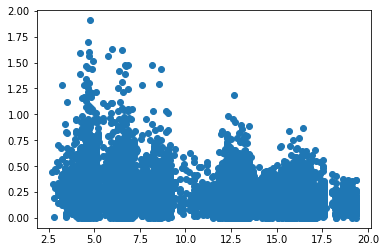

In [12]:
plt.scatter(nptemps,npEn_con)

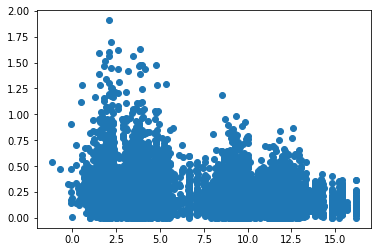

In [13]:
plt.scatter(nptemps_min,npEn_con)

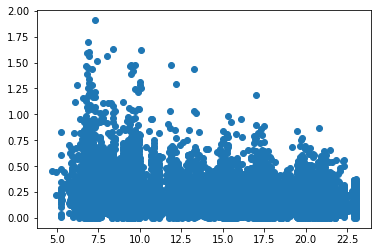

In [14]:
plt.scatter(nptemps_max,npEn_con)

It's finally time to train the model <br>
from : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [15]:
# Split the data into training/testing sets
X_train = nptemps[:-2000]
X_test = nptemps[-2000:]

X_train_min = nptemps_min[:-2000]
X_test_min = nptemps_min[-2000:]

X_train_max = nptemps_max[:-2000]
X_test_max = nptemps_max[-2000:]


# Split the targets into training/testing sets
y_train = npEn_con[:-2000]
y_test = npEn_con[-2000:]


# Create linear regression object
regr = linear_model.LinearRegression()
regr_min= linear_model.LinearRegression()
regr_max= linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
regr_min.fit(X_train_min, y_train)
regr_max.fit(X_train_max, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred_min = regr_min.predict(X_test_min)
y_pred_max = regr_max.predict(X_test_max)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
print('Mean squared error min: %.8f'
      % mean_squared_error(y_test, y_pred_min))
print('Mean squared error max: %.8f'
      % mean_squared_error(y_test, y_pred_max))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.00819233]
Mean squared error: 0.02123986
Mean squared error min: 0.02120123
Mean squared error max: 0.02127666
Coefficient of determination: 0.07


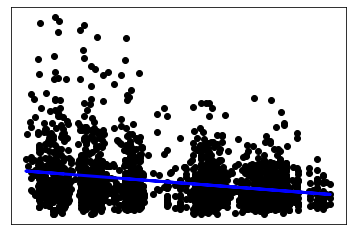

In [16]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

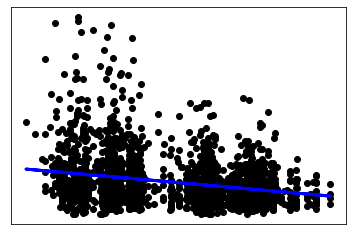

In [18]:
# Plot outputs
plt.scatter(X_test_min, y_test,  color='black')
plt.plot(X_test_min, y_pred_min, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

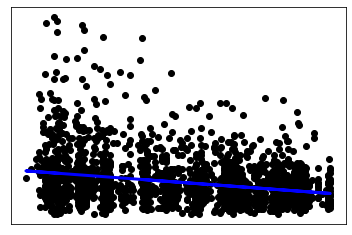

In [19]:
# Plot outputs
plt.scatter(X_test_max, y_test,  color='black')
plt.plot(X_test_max, y_pred_max, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

It could be that the prediction on the test set is better than a prediction on for a new data set because there are relativly few values for the temperature in the training/test data

## Combine temps for multi linear model

In [23]:
combinetemps=[]
for i in range(len(temps)):
    temp=[]
    temp.append(temps[i])
    temp.append(temps_min[i])
    temp.append(temps_max[i])
    combinetemps.append(temp)
    
npcombinetemps=np.array(combinetemps)

In [30]:
npcombinetemps=npcombinetemps.reshape(-1,3)
print(temps[0])
print(temps_min[0])
print(npcombinetemps.shape)
print(npcombinetemps)

0    4.681048
dtype: float64
0    2.125806
dtype: float64
(21074, 3)
[[ 4.68104839  2.12580645  7.11612903]
 [ 4.67513441  2.53225806  7.03870968]
 [ 6.88306452  4.67741935  8.96774194]
 ...
 [12.14726508  9.22580645 15.22580645]
 [ 6.79166667  3.86666667  9.36666667]
 [ 4.76712249  2.4516129   6.93548387]]


it's training time

In [32]:
# Split the data into training/testing sets
X_train_comb = npcombinetemps[:-2000]
X_test_comb = npcombinetemps[-2000:]

# Split the targets into training/testing sets
y_train = npEn_con[:-2000]
y_test = npEn_con[-2000:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.00819233]
Mean squared error: 0.02121291
Coefficient of determination: 0.07


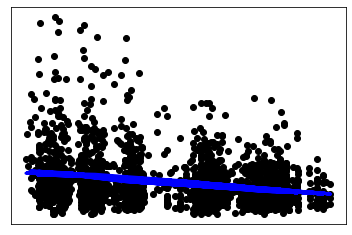

In [33]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_comb, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [55]:
train_months=npmonth_arr[:-2000]
train_months=train_months.reshape(-1, 1)

In [91]:
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
y_predicted = polyreg.fit(train_months,y_train)


In [88]:
test_months=npmonth_arr[-2000:]
test_months=test_months.reshape(-1, 1)
print(train_months)
print(polyreg.predict(train_months))
print(polyreg.predict([[11]]))
ypred=polyreg.predict(test_months)
print(test_months)
print(ypred)

[[12]
 [12]
 [12]
 ...
 [12]
 [ 1]
 [ 2]]
[0.25145904 0.25145904 0.25145904 ... 0.25145904 0.23731517 0.23952111]
[0.22168386]
[[ 3]
 [ 4]
 [ 5]
 ...
 [10]
 [11]
 [12]]
[0.20893294 0.18575861 0.16692859 ... 0.18210471 0.22168386 0.25145904]


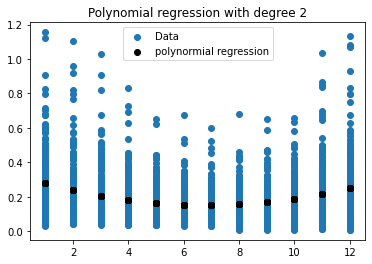

In [92]:
test_months=npmonth_arr[-2000:]
test_months=test_months.reshape(-1, 1)
plt.scatter(test_months,y_test, label = "Data")
plt.scatter(test_months,polyreg.predict(test_months),color="black", label = "polynormial regression")
plt.title("Polynomial regression with degree "+str(degree))
plt.legend()
plt.show()

In [90]:
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, polyreg.predict(test_months)))

Mean squared error: 0.02139660


In [95]:
info = pd.read_csv('addInfo.csv')

In [98]:
info.tail()

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
2138,0xb9c600842cb2d195d461d675f2758ddbf5bb45bb,terraced_house,2.0,2.0,gas,gas,old,y,n,18_to_20,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
2139,0x429e76a41f3141d9e62c4975e6b5df303cb45e64,bungalow,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,0x65fbd9ba598e703d742a32058ea2b323fe4c1fca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,0x101f2dc409b3b95d2bb08ebe5d282f54317e3f8c,bungalow,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,0x9ad41b18c2be3a845acb599af1dc4570feb88489,bungalow,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
brinfo=info.loc[:,["meter_id","num_bedrooms"]]
brinfomean=brinfo.mean()
brinfo=brinfo.fillna(value=brinfo.mean())
meterid=df.loc[:,"meter_id"][5]
row=brinfo.loc[brinfo['meter_id'] == meterid]
print(row)

Empty DataFrame
Columns: [meter_id, num_bedrooms]
Index: []


In [149]:
for i in range(0,df.shape[0]):
    meterid=df.loc[:,"meter_id"][i]
    row=brinfo.loc[brinfo['meter_id'] == meterid]
    if row.empty:
        #brinfo = pd.brinfo([meterid,brinfomean])
        #print(i)
        df2 = pd.DataFrame([[meterid, brinfomean]],columns=brinfo.columns)
        #df2 = pd.DataFrame([[meterid, brinfomean]],columns=brinfo.columns)
        brinfo=brinfo.append(df2)

In [141]:
brinfo

,meter_id,num_bedrooms
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,3
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,2
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,3.11243
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,4
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,3.11243
...,...,...
0,0xdf6a54b92985398af03423426e744c6d40ee8c69,num_bedrooms 3.112426 dtype: float64
0,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,num_bedrooms 3.112426 dtype: float64
0,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,num_bedrooms 3.112426 dtype: float64
0,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,num_bedrooms 3.112426 dtype: float64


In [151]:
meterid=df.loc[:,"meter_id"][5]
row=brinfo.loc[brinfo['meter_id'] == meterid]
print(row.loc[:,"num_bedrooms"])

0    num_bedrooms    3.112426
dtype: float64
Name: num_bedrooms, dtype: object


In [152]:
br_arr=[]
NaN_t=1200

#for i in range(0,df.shape[0]):

for i in range(0,df.shape[0]):
    #load rows
    meter=df.iloc[i]
    meterid=df.loc[:,"meter_id"][i]
    row=brinfo.loc[brinfo['meter_id'] == meterid]
    
    # loop over all months
    for m in range (1,13):
        ind_b,ind_e=get_monthi(m)               #get index of beginning and end of month
        month=meter[ind_b:ind_e]

        # Check if months has numeric values        
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            br_arr.append(row.loc[:,"num_bedrooms"])

In [153]:
npbr_arr=np.array(br_arr)

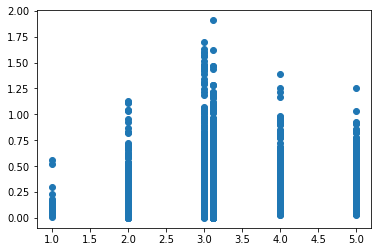

In [154]:
plt.scatter(npbr_arr,npEn_con)

In [157]:
train_br=npbr_arr[:-2000]
train_br=train_br.reshape(-1, 1)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
y_predicted = polyreg.fit(train_br,y_train)

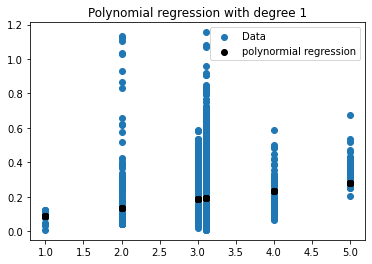

In [158]:
test_br=npbr_arr[-2000:]
test_br=test_br.reshape(-1, 1)
plt.scatter(test_br,y_test, label = "Data")
plt.scatter(test_br,polyreg.predict(test_br),color="black", label = "polynormial regression")
plt.title("Polynomial regression with degree "+str(degree))
plt.legend()
plt.show()

In [159]:
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, polyreg.predict(test_br)))

Mean squared error: 0.02269925


In [161]:
combinefeatures=[]
for i in range(len(temps)):
    temp=[]
    temp.append(temps[i])
    temp.append(temps_min[i])
    temp.append(temps_max[i])
    temp.append(month_arr[i])
    temp.append(br_arr[i])
    combinefeatures.append(temp)
    
npcombinefeatures=np.array(combinefeatures)
npcombinefeatures=npcombinefeatures.reshape(-1,5)

d:\programmas\anaconda\envs\forecastingenergyconsumption\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [166]:
combinefeatures

[[0    4.681048
  dtype: float64,
  0    2.125806
  dtype: float64,
  0    7.116129
  dtype: float64,
  12,
  1106    2
  Name: num_bedrooms, dtype: object],
 [12    4.675134
  dtype: float64,
  12    2.532258
  dtype: float64,
  12    7.03871
  dtype: float64,
  12,
  0    num_bedrooms    3.112426
  dtype: float64
  Name: num_bedrooms, dtype: object],
 [24    6.883065
  dtype: float64,
  24    4.677419
  dtype: float64,
  24    8.967742
  dtype: float64,
  12,
  0    num_bedrooms    3.112426
  dtype: float64
  Name: num_bedrooms, dtype: object],
 [36    6.883065
  dtype: float64,
  36    4.677419
  dtype: float64,
  36    8.967742
  dtype: float64,
  12,
  1881    3.11243
  Name: num_bedrooms, dtype: object],
 [48    4.48871
  dtype: float64,
  48    2.154839
  dtype: float64,
  48    6.641935
  dtype: float64,
  12,
  0    num_bedrooms    3.112426
  dtype: float64
  Name: num_bedrooms, dtype: object],
 [60    4.681048
  dtype: float64,
  60    2.125806
  dtype: float64,
  60    7.116

In [167]:
# Split the data into training/testing sets
X_train_comb = npcombinefeatures[:-2000]
X_test_comb = npcombinefeatures[-2000:]

# Split the targets into training/testing sets
y_train = npEn_con[:-2000]
y_test = npEn_con[-2000:]


# Create linear regression object
regr_comb = linear_model.LinearRegression()

# Train the model using the training sets
regr_comb.fit(X_train_comb, y_train)


# Make predictions using the testing set
y_pred_comb = regr_comb.predict(X_test_comb)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred_comb))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.00819233]
Mean squared error: 0.02097738
Coefficient of determination: 0.07


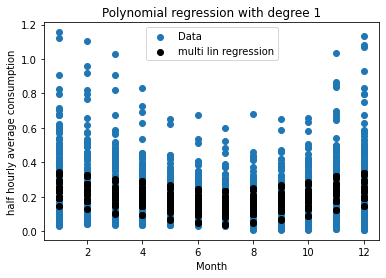

In [178]:
plt.scatter(test_months,y_test, label = "Data")
plt.scatter(test_months,regr_comb.predict(X_test_comb),color="black", label = "multi lin regression")
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("Month")
plt.ylabel("half hourly average consumption")
plt.legend()
plt.show()

Average Temp

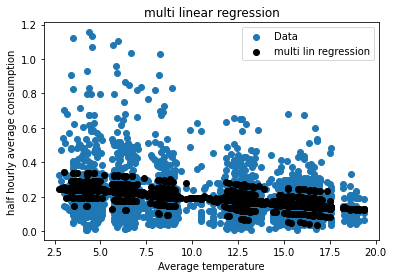

In [177]:
plt.scatter(X_test,y_test, label = "Data")
plt.scatter(X_test,regr_comb.predict(X_test_comb),color="black", label = "multi lin regression")
plt.title("multi linear regression")
plt.xlabel("Average temperature")
plt.ylabel("half hourly average consumption")
plt.legend()
plt.show()

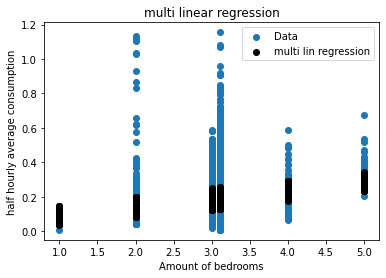

In [176]:
plt.scatter(test_br,y_test, label = "Data")
plt.scatter(test_br,regr_comb.predict(X_test_comb),color="black", label = "multi lin regression")
plt.title("multi linear regression")
plt.xlabel("Amount of bedrooms")
plt.ylabel("half hourly average consumption")
plt.legend()
plt.show()